In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import pearsonr, spearmanr, mannwhitneyu, ttest_ind

In [2]:
cv_df = pd.read_csv('../finches/predict-tiles-31.csv', index_col=0)
mp_df = pd.read_csv('../finches/predict-tiles-mpipi-31.csv', index_col=0)

In [3]:
cv_df['activity'] = cv_df.apply(lambda row: row['Activity_ratioB'] if np.isnan(row['Activity_ratioA']) else row['Activity_ratioA'], axis=1)
cv_df = cv_df.dropna(subset=['activity']) #drop unmeasured tiles
mp_df['activity'] = mp_df.apply(lambda row: row['Activity_ratioB'] if np.isnan(row['Activity_ratioA']) else row['Activity_ratioA'], axis=1)
mp_df = mp_df.dropna(subset=['activity'])

#### Final plot

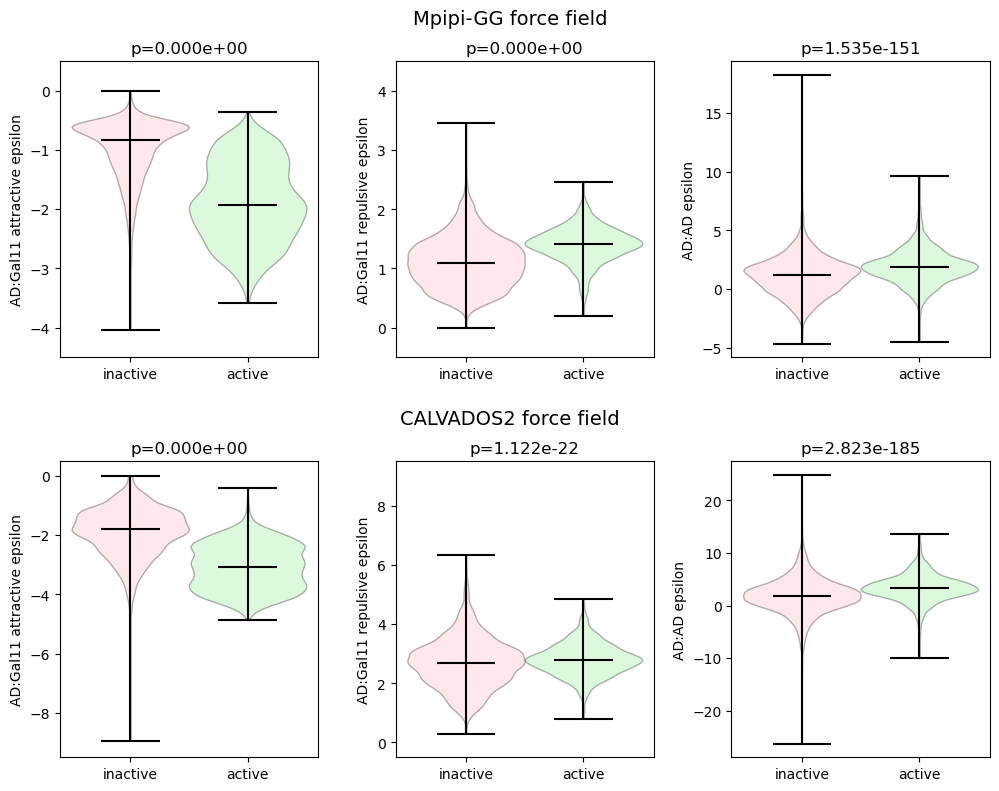

In [57]:
'''
Setup
'''
test = mannwhitneyu #or ttest_ind

#Use same threshold as Figure 2C (top 20%)
threshold = np.percentile(mp_df['activity'], 80)
#Mpipi
active_mp_seq = mp_df[mp_df['activity'] > threshold].copy()
inactive_mp_seq = mp_df[mp_df['activity'] < threshold].copy()
#CALVADOS
active_cv_seq = cv_df[cv_df['activity'] > threshold].copy()
inactive_cv_seq = cv_df[cv_df['activity'] < threshold].copy()

'''
Plot
'''
#params
mpl.rcdefaults()
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
colors = ['lightpink', 'lightgreen']
labels = ['inactive', 'active']
positions = [1, 1.5]
def color(vp):
    vp['cmedians'].set_color('black')
    vp['cmins'].set_color('black')
    vp['cmaxes'].set_color('black')
    vp['cbars'].set_color('black')
    for pc, color in zip(vp['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_edgecolor('black')
        
#setup plot
fig = plt.figure(figsize=(12, 8))
subfigs = fig.subfigures(nrows=2, ncols=1)

#Row 1 --- Mpipi
subfigs[0].suptitle('Mpipi-GG force field', fontsize=14)
row1 = subfigs[0].subplots(nrows=1, ncols=3)

row1[0].set_title(f'p={test(inactive_mp_seq["attractive"], active_mp_seq["attractive"], alternative="greater").pvalue:.3e}')
vp = row1[0].violinplot(
    (inactive_mp_seq['attractive'], active_mp_seq['attractive']),
    positions,
    widths=0.5,
    showmedians=True,
)
color(vp)
row1[0].set_xticks(positions)
row1[0].set_xticklabels(labels)
row1[0].set_ylabel('AD:Gal11 attractive epsilon')
row1[0].set_ylim(-4.5, 0.5)

row1[1].set_title(f'p={test(inactive_mp_seq["repulsive"], active_mp_seq["repulsive"], alternative="less").pvalue:.3e}')
vp = row1[1].violinplot(
    (inactive_mp_seq['repulsive'], active_mp_seq['repulsive']),
    positions,
    widths=0.5,
    showmedians=True,
)
color(vp)
row1[1].set_xticks(positions)
row1[1].set_xticklabels(labels)
row1[1].set_ylabel('AD:Gal11 attractive epsilon')
row1[1].set_ylabel('AD:Gal11 repulsive epsilon')
row1[1].set_ylim(-0.5, 4.5)

row1[2].set_title(f'p={test(inactive_mp_seq["self"], active_mp_seq["self"], alternative="less").pvalue:.3e}')
vp = row1[2].violinplot(
    (inactive_mp_seq['self'], active_mp_seq['self']),
    positions,
    widths=0.5,
    showmedians=True,
)
color(vp)
row1[2].set_xticks(positions)
row1[2].set_xticklabels(labels)
row1[2].set_ylabel('AD:AD epsilon')

#Row 2 --- CALVADOS
subfigs[1].suptitle('CALVADOS2 force field', fontsize=14)
row2 = subfigs[1].subplots(nrows=1, ncols=3)

row2[0].set_title(f'p={test(inactive_cv_seq["attractive"], active_cv_seq["attractive"], alternative="greater").pvalue:.3e}')
vp = row2[0].violinplot(
    (inactive_cv_seq['attractive'], active_cv_seq['attractive']),
    positions,
    widths=0.5,
    showmedians=True,
)
color(vp)
row2[0].set_xticks(positions)
row2[0].set_xticklabels(labels)
row2[0].set_ylabel('AD:Gal11 attractive epsilon')
row2[0].set_ylim(-9.5, 0.5)

row2[1].set_title(f'p={test(inactive_cv_seq["repulsive"], active_cv_seq["repulsive"], alternative="less").pvalue:.3e}')
vp = row2[1].violinplot(
    (inactive_cv_seq['repulsive'], active_cv_seq['repulsive']),
    positions,
    widths=0.5,
    showmedians=True,
)
color(vp)
row2[1].set_xticks(positions)
row2[1].set_xticklabels(labels)
row2[1].set_ylabel('AD:Gal11 repulsive epsilon')
row2[1].set_ylim(-0.5, 9.5)

row2[2].set_title(f'p={test(inactive_cv_seq["self"], active_cv_seq["self"], alternative="less").pvalue:.3e}')
vp = row2[2].violinplot(
    (inactive_cv_seq['self'], active_cv_seq['self']),
    positions,
    widths=0.5,
    showmedians=True,
)
color(vp)
row2[2].set_xticks(positions)
row2[2].set_xticklabels(labels)
row2[2].set_ylabel('AD:AD epsilon')

subfigs[0].subplots_adjust(wspace=0.3)
subfigs[1].subplots_adjust(wspace=0.3)
fig.subplots_adjust(top=0.85)
plt.savefig('./finches-tiles.svg', format='svg')
plt.show()